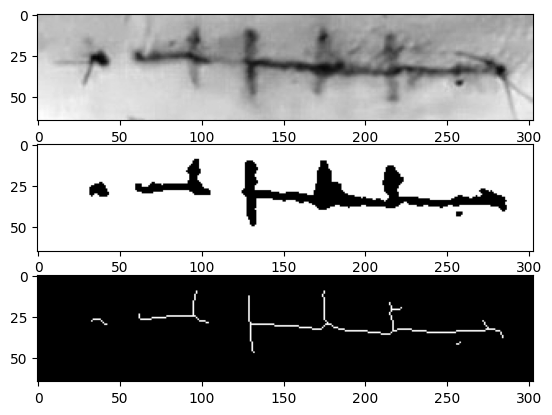

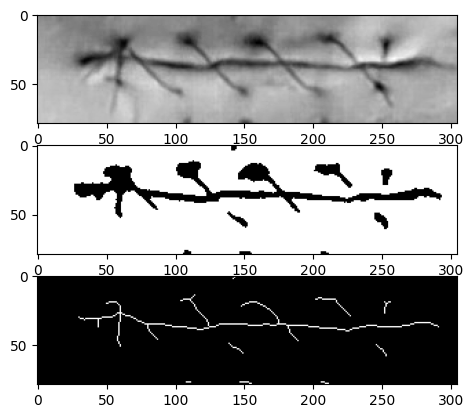

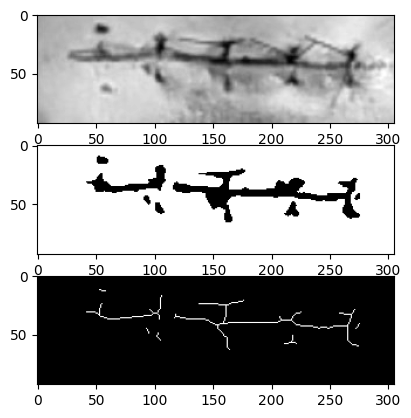

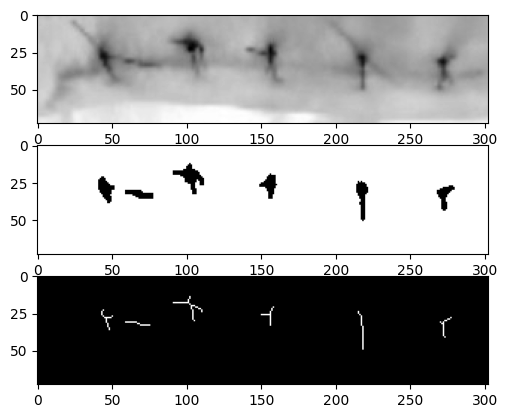

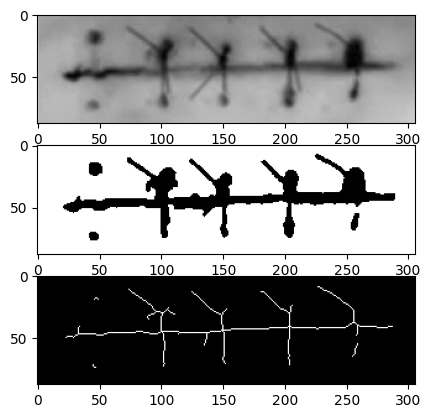

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import active_contour

for x in range(5):
    img = skimage.io.imread("https://raw.githubusercontent.com/D0miq/ZDO_Incision/main/data/data" + str(x) + ".jpg")
    img = rgb2gray(img) * 255

    # higher contrast
    img = skimage.exposure.rescale_intensity(img, out_range=(0,255))
    
    plt.figure()
    plt.subplot(3, 1, 1)
    plt.imshow(img, cmap='gray')

    # region based segmentation
    elevation_map = sobel(img)

    markers = np.zeros_like(img)
    markers[img < 100] = 1
    markers[img > 140] = 2

    segmentation = skimage.segmentation.watershed(elevation_map, markers)

    plt.subplot(3, 1, 2)
    plt.imshow(segmentation, cmap='gray')

    # convert image to 0 and 1
    segmentation[segmentation < 1.5] = 1
    segmentation[segmentation > 1.5] = 0

    # skeletonization
    skelet = skimage.morphology.skeletonize(segmentation)
    plt.subplot(3, 1, 3)
    plt.imshow(skelet, cmap='gray')

plt.show()